# Random Number Practices

## Import the random module

In [23]:
import random
import pandas as pd

In [2]:
random.randint(-90, 90)

-38

In [3]:
random.random()

0.5820041821538138

In [4]:
random_number = random.randint(-90,89) + random.random()

random_number

88.78484716429158

In [5]:
x = 1
latitudes = []

while x < 11:
    random_lat = random.randint(-90,89) + random.random()
    latitudes.append(random_lat)
    x +=1
    
    print(x)

2
3
4
5
6
7
8
9
10
11


In [6]:
latitudes

[-36.610667549091225,
 83.88578180553563,
 -34.360058468740455,
 6.954857538471314,
 -8.313930426443045,
 60.74294816390737,
 8.705304184536223,
 34.82625497189728,
 -5.747909593260204,
 -13.380422193075063]

In [7]:
random.randrange(-90,90, step=3)

66

In [8]:
random.uniform(-90,90)

33.6368487839963

## Import NumPy

In [9]:
import numpy as np

In [10]:
np.random.uniform(-90.000, 90.000)

-28.34368895556581

### Option to above

In [11]:
np.random.uniform(low=-90, high=90)

-38.56229149736228

### Size creates the number of rows in the list

In [12]:
np.random.uniform(-90.000, 90.000, size=50)

array([ -0.35419189,  88.20121584,  28.62940143,  20.09521636,
         3.67133156, -66.81483041,  36.00677262,  51.48350351,
        -1.86875826, -37.10507737,  18.37822147, -89.65147955,
        14.60425559,   7.87355874, -36.34326976, -59.71952518,
       -15.72070352,   8.79561957,   9.55195297, -87.48008606,
       -73.40679901,  22.06901237,  27.67721658,  72.43256882,
        -5.23160869,  88.62571526,  13.73397863,  36.88230311,
        87.24268843, -19.22605507,  -2.46917412,  47.03786293,
       -12.96708562, -65.72369624,  35.45297963,  70.60507199,
        39.03997939,  43.28283658,  32.62823787, -86.16452261,
        12.40852709,  87.06649121,  70.08280709, -73.87350547,
       -86.06453772, -51.0814231 ,  62.45285161, -30.60828816,
        10.89948699,  -7.99934169])

## Import timeit module and add %timeit magic command

In [13]:
import timeit

### Time how long it takes to run numpy random for 1500 rows

In [14]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

18.6 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Time how long it takes to do a while loop for the same 1500 rows

In [15]:
def latitudes(size):
    latitudes = []
    x=0
    while x < (size):
        random_lat = random.randint(-90,90) + random.random()
        latitudes.append(random_lat)
        x += 1
        return latitudes
# call the function with 1500

%timeit latitudes(1500)

1.96 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
latitudes

<function __main__.latitudes(size)>

In [17]:
latitudes

<function __main__.latitudes(size)>

In [18]:
latitudes

<function __main__.latitudes(size)>

In [19]:
# import linear regression from SciPy stats module
from scipy.stats import linregress

In [21]:
# load and read csv file
city_data_to_load = "weather_data/cities.csv"

In [25]:
city_data_df = pd.read_csv(city_data_to_load)

In [26]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [28]:
# perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Get the equation of the line
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)
print(f'The p-value is: {p_value:.3f}')

y = -0.64x + 64.57
The p-value is: 0.000


In [31]:
# Calculate the regression line 'y values' from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

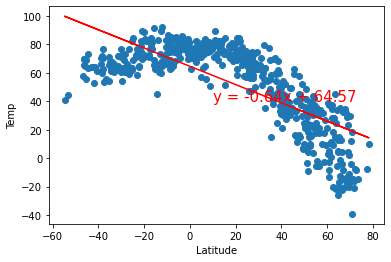

In [32]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Create a scatter plot of the x and y values

plt.scatter(lats, max_temps)

# Plot the regression line with the x-values and the y coordinates base on the intercept and the slope
plt.plot(lats, regress_values, 'r')

# Annotate the text for the line equation and add its coordinates
plt.annotate(line_eq, (10,40), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()